# Outliers

In [86]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

C:\Users\Sasmitabhoi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

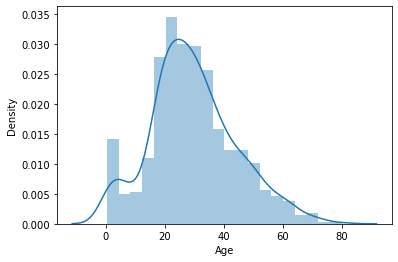

In [7]:
sns.distplot(df['Age'].dropna())

C:\Users\Sasmitabhoi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

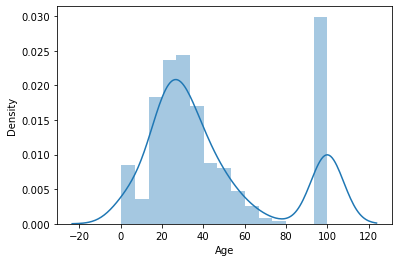

In [9]:
sns.distplot(df['Age'].fillna(100))

## Gaussian/Normal Distribution

Text(0, 0.5, 'No of Passenger')

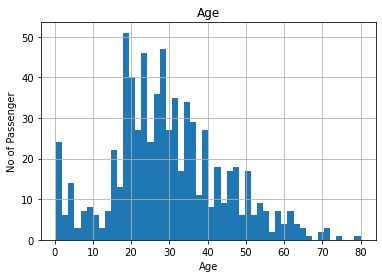

In [12]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

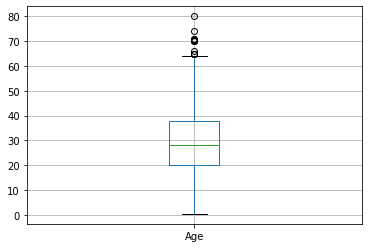

In [13]:
figure = df.boxplot(column='Age')

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
### Assume Age follows Gaussian Distribution , we shall calculate the boundaries which differentiates 

In [24]:
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()

print(upper_boundary),print(lower_boundary),print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

# Interquantile Range

In [25]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
IQR

17.875

In [27]:
lower_bridge=df['Age'].quantile(0.25)-(1.5*IQR)
upper_bridge=df['Age'].quantile(0.75)+(1.5*IQR)
print(lower_bridge),print(upper_bridge)

-6.6875
64.8125


(None, None)

In [28]:
### Extreme Outliers
lower_bridge=df['Age'].quantile(0.25)-(3*IQR)
upper_bridge=df['Age'].quantile(0.75)+(3*IQR)
print(lower_bridge),print(upper_bridge)

-33.5
91.625


(None, None)

### Skewed Dataset

Text(0, 0.5, 'No of Passenger')

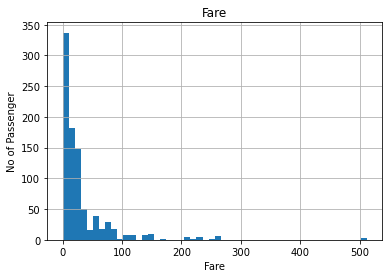

In [29]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

<AxesSubplot:>

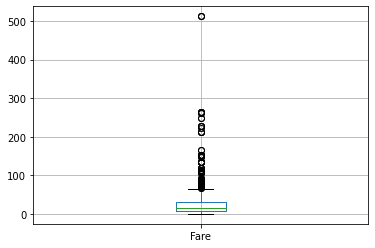

In [30]:
df.boxplot(column='Fare')

In [32]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [70]:
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR

23.0896

In [71]:
lower_bridge=df['Fare'].quantile(0.25)-(1.5*IQR)
upper_bridge=df['Fare'].quantile(0.75)+(1.5*IQR)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [72]:
### Extreme Outliers
lower_bridge=df['Fare'].quantile(0.25)-(3*IQR)
upper_bridge=df['Fare'].quantile(0.75)+(3*IQR)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [ ]:
### Gaussian - 3 STd Deviation
### Left/Right Skewed - Extreme Outlier

In [ ]:
###Do some featuring engineering now and apply some technique

In [87]:
data=df.copy()

In [88]:
data.loc[data['Age']>73,'Age']=73

In [89]:
data.loc[data['Fare']>100,'Fare']=100

In [100]:
data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S


Text(0, 0.5, 'No of Passenger')

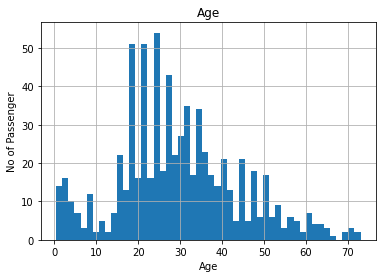

In [101]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

Text(0, 0.5, 'No of Passenger')

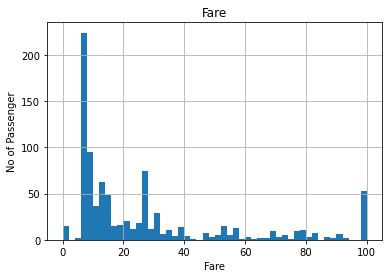

In [102]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')